### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

# Libraries Imported
- Pandas
- Numpy
- Matplotlib
- sklearn
    - StandardScaler
    - PCA
    - LabelEncoder

In [46]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [50]:
# Remove the ! from the line below to install the graphviz package
!pip install graphviz

In [52]:
# Remove the ! from the line below to install the pydotplus package
!pip install pydotplus

# Read In Data to DataFrame

In [26]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [27]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [28]:
len(df['AirportFrom'].unique())

293

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


# Preprocessing: Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [30]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

# Make a copy of the DataFrame for preprocessing

In [31]:
encoded_df = df.copy()

In [32]:
unique_airport_from = df['AirportFrom'].unique()
unique_airport_to = df['AirportTo'].unique()

unique_codes = set(unique_airport_from).union(unique_airport_to)
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFromIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,186,61
1,2,US,1558,PHX,CLT,3,15,222,1,41,165
2,3,AA,2400,LAX,DFW,3,20,165,1,159,142
3,4,AA,2466,SFO,DFW,3,20,195,1,186,142
4,5,AS,108,ANC,SEA,3,30,202,0,96,287
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,121,153
539379,539380,FL,398,SEA,ATL,5,1439,305,0,287,49
539380,539381,FL,609,SFO,MKE,5,1439,255,0,186,235
539381,539382,UA,78,HNL,SFO,5,1439,313,1,236,186


In [33]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['AirlineID'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,CO,269,SFO,IAH,3,15,205,1,186,61,2824
1,2,US,1558,PHX,CLT,3,15,222,1,41,165,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,159,142,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,186,142,5506
4,5,AS,108,ANC,SEA,3,30,202,0,96,287,5012


In [34]:
len(encoded_df["AirportFrom"].unique())

293

In [35]:
len(encoded_df["AirportTo"].unique())

293

In [36]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])
encoded_df.head()

,id,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,1,269,3,15,205,1,186,61,2824
1,2,1558,3,15,222,1,41,165,1409
2,3,2400,3,20,165,1,159,142,5506
3,4,2466,3,20,195,1,186,142,5506
4,5,108,3,30,202,0,96,287,5012


In [37]:
# Drop the id column since this is a hard-coded index
encoded_df = encoded_df.drop(columns=['id'])
encoded_df.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,1,186,61,2824
1,1558,3,15,222,1,41,165,1409
2,2400,3,20,165,1,159,142,5506
3,2466,3,20,195,1,186,142,5506
4,108,3,30,202,0,96,287,5012


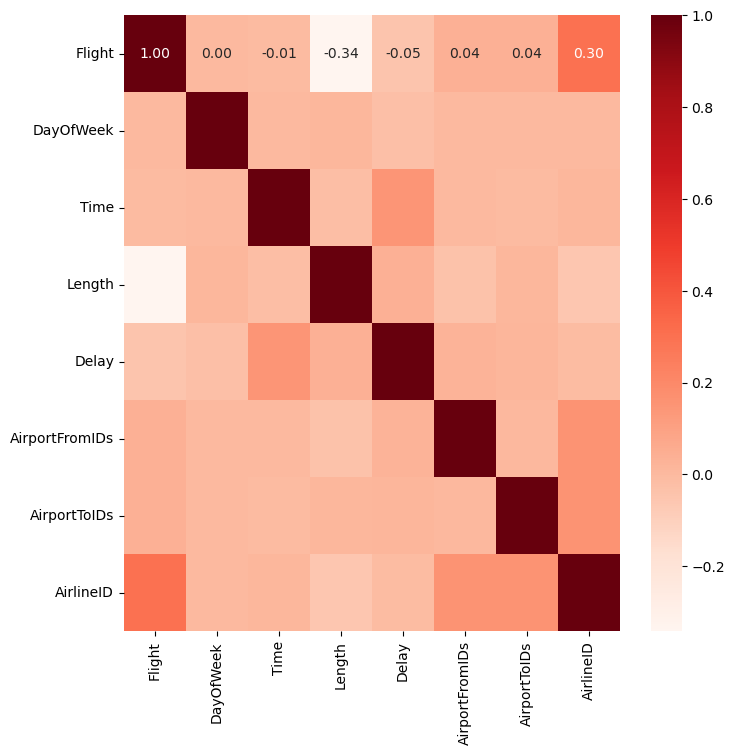

In [38]:
# Create a correlation matrix to see how features are related
plt.figure(figsize=(8,8))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

# Prepare the data for modeling

In [39]:
# Define X for training and testing and drop the Delay column since it's our target
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,Time,Length,AirportFromIDs,AirportToIDs,AirlineID
0,269,3,15,205,186,61,2824
1,1558,3,15,222,41,165,1409
2,2400,3,20,165,159,142,5506
3,2466,3,20,195,186,142,5506
4,108,3,30,202,96,287,5012


In [40]:
# Define the Delay column as our target
y = df['Delay']

In [68]:
X["Time"].min(), X["Time"].max()

(10, 1439)

# Scale the Data
## SVM, KNN, K-Means, and PCA need scaling

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Scaling the X train data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.77354129, -1.00835128,  0.14204092, ...,  1.01246144,
        -0.74948706,  1.9046467 ],
       [-1.03732027,  0.0369531 ,  0.22477227, ..., -0.06889984,
         1.1105728 , -1.25396763],
       [ 2.0539757 ,  0.0369531 ,  0.95136931, ..., -0.26956482,
        -0.8608679 ,  1.35425463],
       ...,
       [ 2.01719185, -0.48569909, -1.59172033, ...,  1.60330833,
        -0.88314406,  1.35425463],
       [-0.7203015 , -0.48569909,  0.54850362, ...,  1.11279393,
         1.47812954,  0.01350438],
       [ 0.25447071, -0.48569909, -1.37589943, ..., -1.32862998,
        -0.88314406,  0.04370146]])

In [43]:
# Scale X test data by using StandardScaler()
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.96056407,  1.60490968,  0.28232451, ..., -0.13578816,
         0.16383574,  2.16877048],
       [-1.02425232, -1.00835128, -0.49463074, ...,  1.11279393,
        -0.88314406,  0.01350438],
       [-0.33261901,  1.60490968, -1.21403375, ..., -0.23612065,
         0.86553497, -0.11734962],
       ...,
       [-1.03490027,  0.5596053 ,  0.13484689, ...,  1.48067973,
         1.5672342 ,  0.01350438],
       [-0.35488292,  1.08225749,  0.04492152, ...,  0.09832098,
        -1.06135339,  0.04370146],
       [ 0.6160173 , -1.53100347,  1.75350366, ..., -0.14693622,
        -0.8608679 ,  0.10570613]])

## Build Decision Tree Model

In [53]:

#Use DecisionTreeRegressor to train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

dt_model = DecisionTreeClassifier(max_depth=5, random_state=1)

dt_model.fit(X_train_scaled, y_train)

#Get predictions
dt_predictions = dt_model.predict(X_test_scaled)


Decision Tree Mean Absolute Error:  0.3641413167613426
Accuracy Score : 0.6358586832386575


## Evaluate the model

In [ ]:
#Calculate the mean absolute error
dt_mae = mean_absolute_error(y_test, dt_predictions)

print("Decision Tree Mean Absolute Error: ", dt_mae)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
print(f"Accuracy Score : {accuracy_score(y_test, dt_predictions)}")

In [54]:
# Create DOT data
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X_train.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
graph.write_png("DecisionTreeModel_1.png")
#Image(graph.create_png())

## Optimize Decision Tree Performance

In [63]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=5)

# Train Decision Tree Classifer
dt_model = dt_model.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.630860388888065


## Visualize Decision Tree

In [67]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeModel_2.png')
#Image(graph.create_png())